# Importe de Librerias Necesarias

In [1]:
import pandas as pd #procesamiento de datos - dataframe
import seaborn as sns #visualización
import matplotlib.pyplot as plt #visualización de graficas

# Lectura de datos


Se impota el archivo en formato 'csv' con el siguiente comando

In [2]:
df = pd.read_csv("Data_Caso_Propuesto.csv", sep=",")

# identificacion de los datos 

In [3]:
df

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,17180,BOGOTA,CUNDINAMARCA,NaN,AV CR 7 NO. 166 - 51 LT B,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVES DE SU...
1,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,NaN
2,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,NaN
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.08,7269.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
4,11409,BUGA,VALLE DEL CAUCA,VEREDA CHAMBIMBAL,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,3217197.00,22724.0,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
458,12709,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 562 CENTRO COMERCIAL SA...,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.960534e+07,LOCAL,¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVI...
459,17992,BOGOTA,CUNDINAMARCA,NaN,CR 70 NO. 49-77,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.448242e+09,CASA,NaN
460,12708,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 564 CENTRO COMERCIAL SAN...,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.070134e+07,LOCAL,¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVI...
461,12706,CALI,VALLE DEL CAUCA,PRADOS DEL NORTE,CL 30N # 2B-38 LOCAL 367 CENTRO COMERCIAL SAN...,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,2.060800e+07,LOCAL,¡OPORTUNIDAD PARA INVERTIR! LOCAL EN PROINDIVI...


como podemos observar el dataset cuenta con un total de 12 columnas y 463 registros.

-Columnas numericas 

Area Terreno 
Area Construida
Precio

-Columnas categoricas
 
Ciudad                  
Departamento           
Barrio                   
Direccion               
Detalle Disponibilidad   
Estrato                 
Tipo de Inmueble        
Datos Adicionales 


In [4]:
#df['Precio'] = df['Precio'].round() 
#df['Precio'] = df['Precio'].astype(int)


## Identificacion de valores nulos de cada columna

In [45]:
df.isnull().sum()

Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64

Se puede observar que las variables "Barrio" y "Datos Adicionales" en su gran mayoria cuentan con valores nulos, por lo cual se procede a eliminar dichas columnas directamente.

**Eliminación de valores nulos**

In [46]:
df=df.drop(["Barrio"], axis=1)
df=df.drop(["Datos Adicionales"], axis=1)

## Identificacion de valores duplicados

In [47]:
dup = df.duplicated().sum() #Análisis de valores duplicados
print(" La base de datos tiene "+ str(dup) +" valores duplicados.")

 La base de datos tiene 0 valores duplicados.


## Conteo de valores Cero

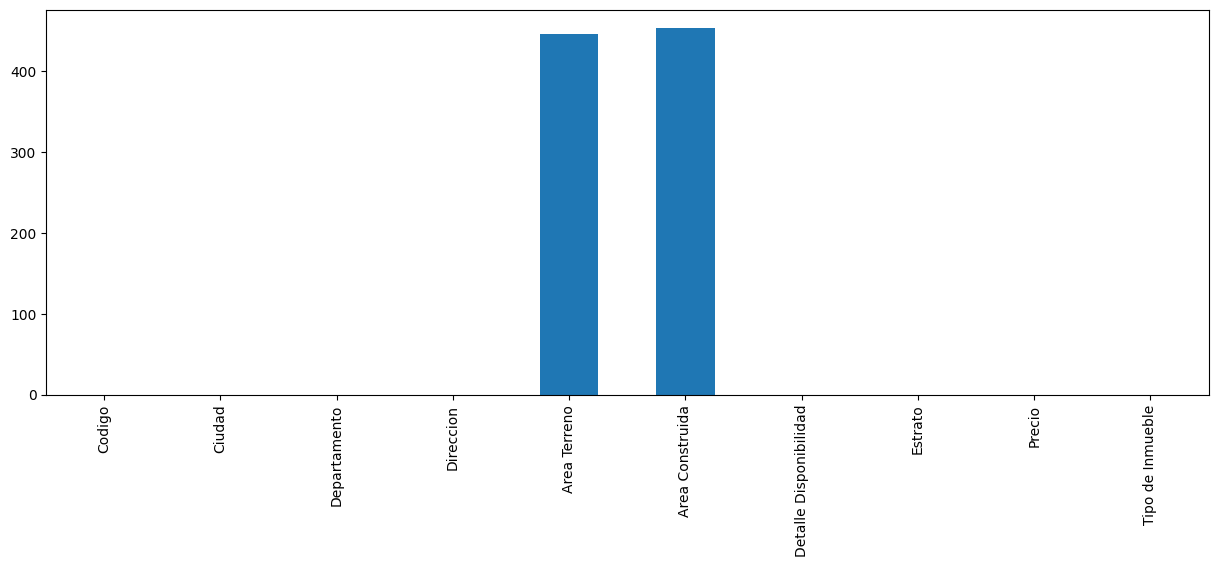

Codigo                      0
Ciudad                      0
Departamento                0
Direccion                   0
Area Terreno              445
Area Construida           453
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
dtype: int64


In [48]:
Cero_Cont = (df==0).sum()
Cero_Cont.plot(kind= "bar", figsize=(15, 5))
plt.show()
print(Cero_Cont) 

Se puede observar que las variables "Area Terreno" y "Area Construida" en su gran mayoria tienen valores en cero, por lo cual se procede a eliminarlas.

**Eliminación de valores en cero**

In [49]:
df=df.drop(["Area Terreno"], axis=1)
df=df.drop(["Area Construida"], axis=1)

#### El dataset queda de la siguiente manera

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Direccion               463 non-null    object 
 4   Detalle Disponibilidad  463 non-null    object 
 5   Estrato                 463 non-null    object 
 6   Precio                  463 non-null    float64
 7   Tipo de Inmueble        463 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 29.1+ KB


## reporte estadístico 

In [51]:
df.describe()

,Codigo,Precio
count,463.000000,4.630000e+02
mean,18003.151188,6.672032e+08
std,1992.191499,3.272992e+09
min,2575.000000,4.650000e+06
25%,18184.500000,1.230500e+07
50%,18332.000000,1.587000e+07
75%,18539.500000,1.379955e+08
max,19344.000000,4.523379e+10


#### boxplot para el precio

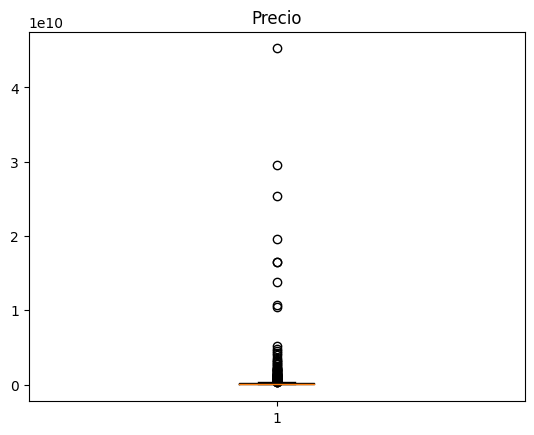

In [52]:
plt.boxplot(df['Precio'])
plt.title("Precio")
plt.show()

## Análisis de resultados y conclusiones

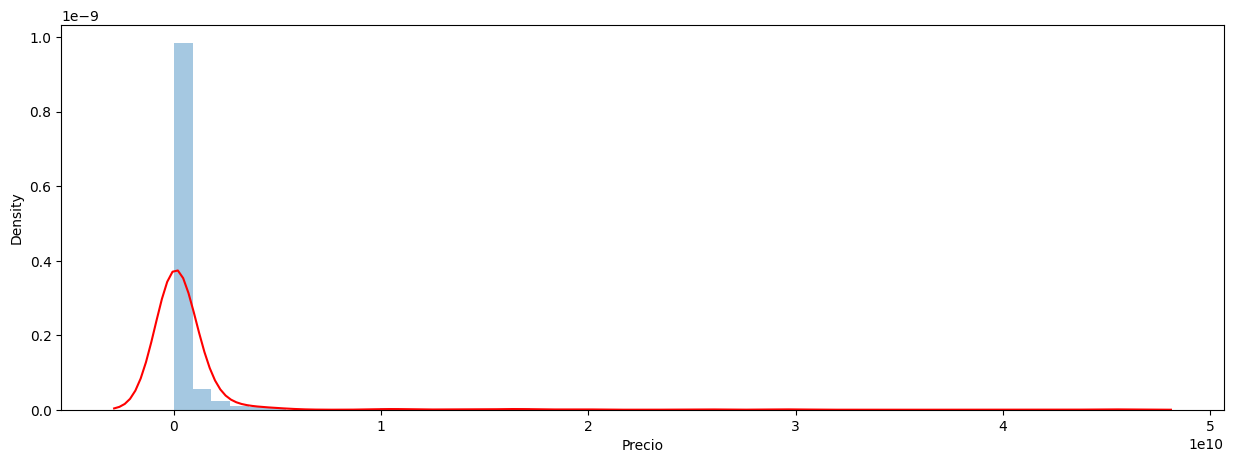

count    4.630000e+02
mean     6.672032e+08
std      3.272992e+09
min      4.650000e+06
25%      1.230500e+07
50%      1.587000e+07
75%      1.379955e+08
max      4.523379e+10
Name: Precio, dtype: float64


In [53]:
tag1= "Precio"
plt.figure(figsize=(15, 5))
sns.distplot(df[tag1], kde_kws= {"color":"r"})
plt.show()
print(df[tag1].describe())

## Creacion de nuevas variables usando One-Hot Encoding

In [81]:
df1=df

In [82]:

df1=df
tipoInmueble=pd.get_dummies(df1["Tipo de Inmueble"])
df1 = pd.concat([df1, tipoInmueble], axis=1) 

detalleDisponibilidad=pd.get_dummies(df1["Detalle Disponibilidad"])
df1 = pd.concat([df1, detalleDisponibilidad], axis=1) 

ciudad=pd.get_dummies(df1["Ciudad"])
df1 = pd.concat([df1, ciudad], axis=1) 

depto=pd.get_dummies(df1["Departamento"])
df1 = pd.concat([df1, depto], axis=1) 

estrato=pd.get_dummies(df1["Estrato"])
df1 = pd.concat([df1, estrato], axis=1) 


# df1=df1.drop(["Tipo de Inmueble"], axis=1)
# df1=df1.drop(["Detalle Disponibilidad"], axis=1)



In [84]:
df1.head()

,Codigo,Ciudad,Departamento,Direccion,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,APARTAMENTO,BODEGA,...,VALLE DEL CAUCA,CINCO,COMERCIAL,CUATRO,DOS,INDUSTRIAL,RURAL,SEIS,TRES,UNO
0,17180,BOGOTA,CUNDINAMARCA,AV CR 7 NO. 166 - 51 LT B,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,0,0,...,0,0,0,0,0,0,0,0,1,0
1,19292,BOGOTA,CUNDINAMARCA,CL 72 No. 12 - 77,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,0,0,...,0,0,1,0,0,0,0,0,0,0
2,19292,BOGOTA,CUNDINAMARCA,CL 72 No. 12 - 77,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2575,SOGAMOSO,BOYACÁ,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,0,0,...,0,0,0,1,0,0,0,0,0,0
4,11409,BUGA,VALLE DEL CAUCA,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,0,0,...,1,0,0,0,0,0,1,0,0,0


In [85]:
df2=df1.iloc[:, 6:118]
df2=df2.drop(["Tipo de Inmueble"], axis=1) 
df2.head()


,Precio,APARTAMENTO,BODEGA,CASA,CLINICA,DEPOSITO,EDIFICIO,EDIFICIO OFICINAS,FINCA,GARAJE,...,VALLE DEL CAUCA,CINCO,COMERCIAL,CUATRO,DOS,INDUSTRIAL,RURAL,SEIS,TRES,UNO
0,2.958081e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.646059e+10,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.646059e+10,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1.376828e+10,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4.523379e+10,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [57]:
import pycaret as pc #libreria para el preprocesamiento de datos 


In [86]:
data=df2.sample(frac=0.85, random_state=0)
data

,Precio,APARTAMENTO,BODEGA,CASA,CLINICA,DEPOSITO,EDIFICIO,EDIFICIO OFICINAS,FINCA,GARAJE,...,VALLE DEL CAUCA,CINCO,COMERCIAL,CUATRO,DOS,INDUSTRIAL,RURAL,SEIS,TRES,UNO
113,37509500.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
21,784336820.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
78,168826320.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
118,31062880.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
225,15870000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,12240000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
291,12305000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
57,837590790.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
321,12305000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [87]:
data_useen=df2.drop(data.index)
data_useen 

,Precio,APARTAMENTO,BODEGA,CASA,CLINICA,DEPOSITO,EDIFICIO,EDIFICIO OFICINAS,FINCA,GARAJE,...,VALLE DEL CAUCA,CINCO,COMERCIAL,CUATRO,DOS,INDUSTRIAL,RURAL,SEIS,TRES,UNO
9,2.042688e+09,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25,4.527474e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
28,5.913994e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
31,5.503612e+08,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
32,5.356705e+08,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,7.350000e+06,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
431,7.350000e+06,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
434,7.350000e+06,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
447,7.152000e+06,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [88]:
data.reset_index(inplace=True, drop=True)
data_useen.reset_index(inplace=True, drop=True)

data.shape, data_useen.shape


((394, 92), (69, 92))

In [74]:
from pycaret.classification import * 


In [91]:
data

,Precio,APARTAMENTO,BODEGA,CASA,CLINICA,DEPOSITO,EDIFICIO,EDIFICIO OFICINAS,FINCA,GARAJE,...,VALLE DEL CAUCA,CINCO,COMERCIAL,CUATRO,DOS,INDUSTRIAL,RURAL,SEIS,TRES,UNO
0,37509500.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,784336820.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,168826320.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,31062880.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,15870000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,12240000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
390,12305000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
391,837590790.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
392,12305000.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
X = df2.drop(["Precio"], axis=1)
y = df.Precio 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=False)

In [101]:
X_train

,APARTAMENTO,BODEGA,CASA,CLINICA,DEPOSITO,EDIFICIO,EDIFICIO OFICINAS,FINCA,GARAJE,HOTEL,...,VALLE DEL CAUCA,CINCO,COMERCIAL,CUATRO,DOS,INDUSTRIAL,RURAL,SEIS,TRES,UNO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
320,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
321,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
322,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [110]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import multiprocessing


# model_setup=setup(X = X, target = y, session_id=123)
# # data.head()

# Creación del modelo
# ==============================================================================
modelo = LogisticRegression()

# Entrenamiento del modelo
# ==============================================================================
# modelo.fit(X_train, y_train)



In [140]:
from numpy import int64


y_train1=np.round(y_train)

y_train1 = y_train1.astype(int64)

modelo.fit(X_train, y_train1)

predicciones = modelo.predict(X = X_test)


In [147]:

y_train2=y_train1.reset_index(inplace=True, drop=True)
model_setup=setup(data = data , target = y_train2, session_id=123) 

,Description,Value
0,Session id,123
1,Target,UNO
2,Target type,Binary
3,Original data shape,"(394, 92)"
4,Transformed data shape,"(394, 79)"
5,Transformed train set shape,"(275, 79)"
6,Transformed test set shape,"(119, 79)"
7,Numeric features,91
8,Preprocess,True
9,Imputation type,simple


In [148]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [149]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9893,0.0000,0.8000,0.9000,0.8333,0.8300,0.8388,0.0070
ada,Ada Boost Classifier,0.9856,0.9700,0.8000,0.8500,0.8000,0.7949,0.8081,0.0180
rf,Random Forest Classifier,0.9820,0.9839,0.8000,0.8000,0.7833,0.7761,0.7849,0.0280
gbc,Gradient Boosting Classifier,0.9820,0.9027,0.8000,0.8000,0.7833,0.7761,0.7849,0.0170
et,Extra Trees Classifier,0.9820,0.9904,0.8000,0.8000,0.7833,0.7761,0.7849,0.0250
lda,Linear Discriminant Analysis,0.9784,0.9155,0.8000,0.7500,0.7667,0.7572,0.7616,0.0100
dt,Decision Tree Classifier,0.9783,0.8942,0.8000,0.7500,0.7500,0.7410,0.7542,0.0090
lightgbm,Light Gradient Boosting Machine,0.9783,0.9828,0.8000,0.8333,0.7833,0.7734,0.7905,0.0120
knn,K Neighbors Classifier,0.9747,0.8887,0.6000,0.6500,0.6000,0.5912,0.6044,0.1380
lr,Logistic Regression,0.9529,0.7534,0.0000,0.0000,0.0000,0.0000,0.0000,0.5180


In [150]:
rf= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9643,0.9259,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9286,0.9135,0.5000,0.5000,0.5000,0.4615,0.4615
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9643,1.0000,0.5000,1.0000,0.6667,0.6500,0.6939
5,0.9630,1.0000,1.0000,0.5000,0.6667,0.6494,0.6934
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [151]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [152]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9643,0.9630,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9643,0.9423,0.5000,1.0000,0.6667,0.6500,0.6939
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9643,1.0000,0.5000,1.0000,0.6667,0.6500,0.6939
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [153]:
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


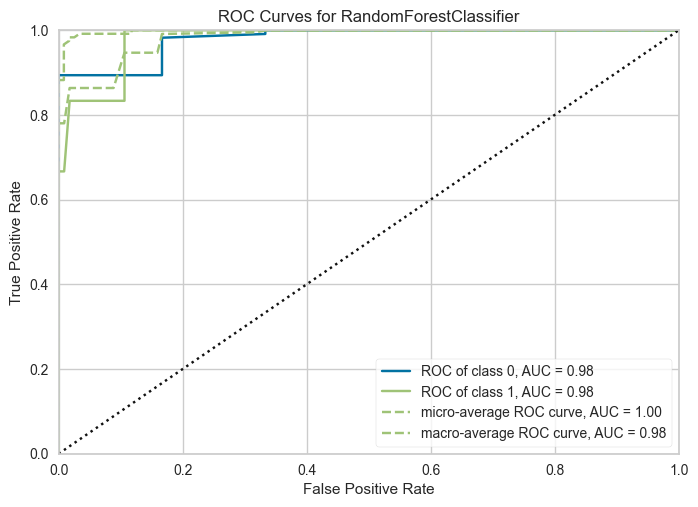

In [154]:
### auc plot
plot_model(tuned_rf, plot = 'auc')

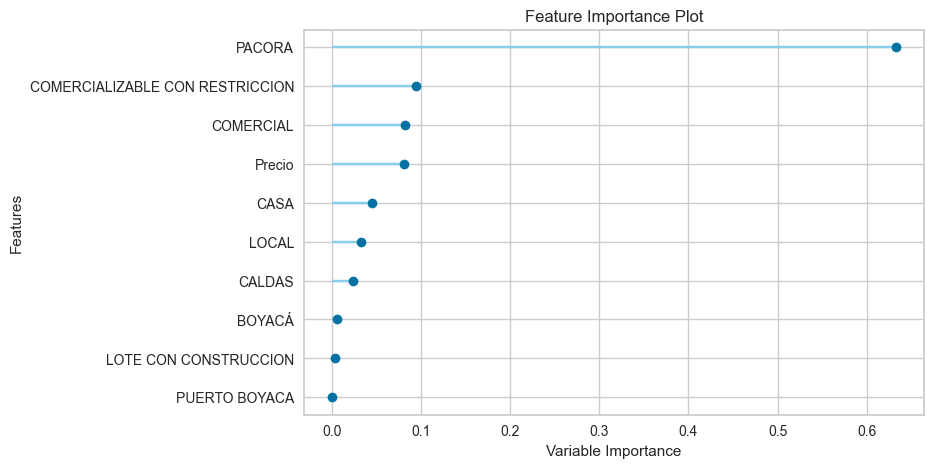

In [155]:
### feature importance plot 
plot_model(tuned_rf, plot = 'feature') 

In [174]:
y_test

from numpy import int64


y_test1=np.round(y_test)

y_test1 = y_test1.astype(int64)
y_test1
y_test1=y_test1.reset_index(inplace=True, drop=True)
test_predicciones=predict_model(tuned_rf, data=y_test1)

predicciones.head(50)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9832,0.9801,0.6667,1.0000,0.8000,0.7916,0.8094


,Precio,APARTAMENTO,BODEGA,CASA,CLINICA,EDIFICIO,FINCA,GARAJE,HOTEL,LOCAL,...,COMERCIAL,CUATRO,DOS,INDUSTRIAL,RURAL,SEIS,TRES,UNO,prediction_label,prediction_score
275,1.756650e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9307
276,7.843368e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9307
277,7.350000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9307
278,1.310750e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9307
279,1.115324e+09,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8950
280,7.350000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9307
281,2.509300e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9307
282,7.350000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9307
283,1.616900e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9307
284,1.906700e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9307


,Codigo,Precio
Codigo,1.000000,-0.259612
Precio,-0.259612,1.000000


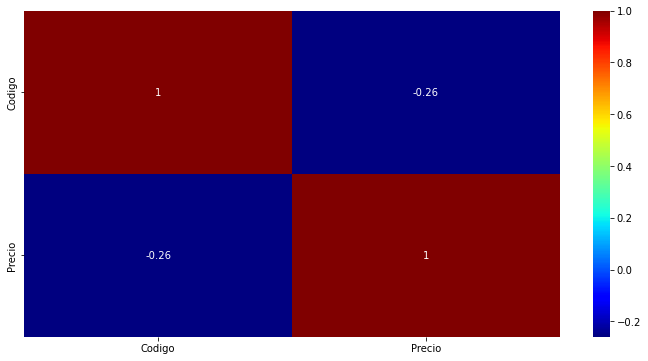

In [16]:


#Ejecución de la matriz de correlación y una heatmap
plt.figure(figsize=(12,6))
cor = df.corr() #validando eliminiación outliers
sns.heatmap(cor,cmap="jet",annot=True)
cor

In [17]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Direccion               463 non-null    object 
 4   Detalle Disponibilidad  463 non-null    object 
 5   Estrato                 463 non-null    object 
 6   Precio                  463 non-null    float64
 7   Tipo de Inmueble        463 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 29.1+ KB


## Ciclo for que muestra la moda de cada variable

In [18]:
# moda all variables
for i in df.columns:
    print(i, df[i].mode())
    print("________________________________________________________")
    print("________________________________________________________")
    print("________________________________________________________")

Codigo 0    19209
1    19210
2    19211
3    19212
4    19213
5    19214
6    19292
Name: Codigo, dtype: int64
____________________________________________________
Ciudad 0    VILLAVICENCIO
Name: Ciudad, dtype: object
____________________________________________________
Departamento 0    META
Name: Departamento, dtype: object
____________________________________________________
Direccion 0                                    CL 72 No. 12 - 77
1    CR 51 B No. 76-136 ED CENTRO EMPRESARIAL LA PR...
2    CR 51 B No. 76-136 ED CENTRO EMPRESARIAL LA PR...
3    CR 51 B No. 76-136 ED CENTRO EMPRESARIAL LA PR...
4    CR 51 B No. 76-136 ED CENTRO EMPRESARIAL LA PR...
5    CR 51 B No. 76-136 ED CENTRO EMPRESARIAL LA PR...
6    CR 51 B No. 76-136 ED CENTRO EMPRESARIAL LA PR...
Name: Direccion, dtype: object
____________________________________________________
Detalle Disponibilidad 0    COMERCIALIZABLE
Name: Detalle Disponibilidad, dtype: object
____________________________________________________

### Grafico de barras con la cantidad de tipos de inmuebles que existen

<AxesSubplot:>

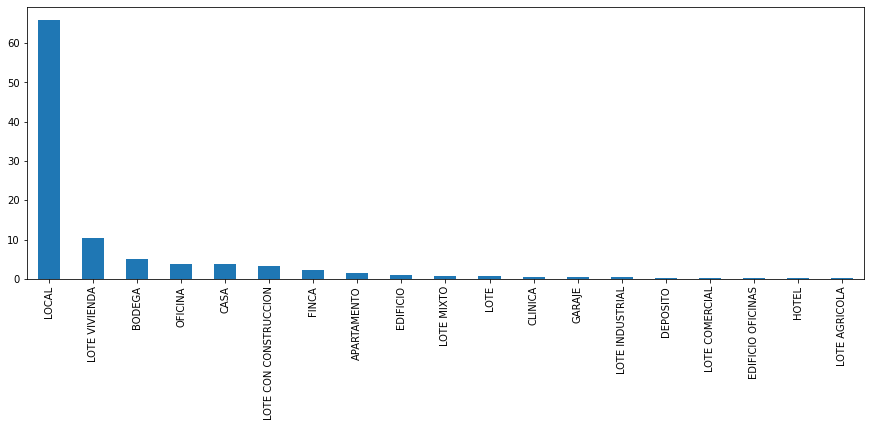

In [19]:
tipos_inmuebles=df["Tipo de Inmueble"].value_counts()
tipos_inmueblesPorcentaje=100 * df['Tipo de Inmueble'].value_counts() / len(df['Tipo de Inmueble'])
tipos_inmueblesPorcentaje.plot(kind= "bar", figsize=(15, 5))  

In [20]:
tipos_inmuebles #cantidad de inmuebles por tipo, tabla de frecuencias exactas 

LOCAL                    305
LOTE VIVIENDA             48
BODEGA                    23
OFICINA                   17
CASA                      17
LOTE CON CONSTRUCCION     15
FINCA                     10
APARTAMENTO                7
EDIFICIO                   4
LOTE MIXTO                 3
LOTE                       3
CLINICA                    2
GARAJE                     2
LOTE INDUSTRIAL            2
DEPOSITO                   1
LOTE COMERCIAL             1
EDIFICIO OFICINAS          1
HOTEL                      1
LOTE AGRICOLA              1
Name: Tipo de Inmueble, dtype: int64

In [21]:
# sns.relplot(x='Tipo de Inmueble',
# y='valor_seguro',hue='fumador',data=df)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Direccion               463 non-null    object 
 4   Detalle Disponibilidad  463 non-null    object 
 5   Estrato                 463 non-null    object 
 6   Precio                  463 non-null    float64
 7   Tipo de Inmueble        463 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 29.1+ KB


In [22]:
df["Estrato"].value_counts()

COMERCIAL     307
RURAL          40
UNO            21
TRES           19
CUATRO         19
INDUSTRIAL     16
DOS            16
SEIS           15
CINCO          10
Name: Estrato, dtype: int64

In [23]:



Estraro_array={0:"RURAL",1:"UNO",2:"DOS",3:"TRES",4:"CUATRO",5:"CINCO",6:"SEIS",7:"COMERCIAL",8:"INDUSTRIAL"}
arrayAgg=list
for i in range(df.shape[0]):
    for j in range(len(Estraro_array)):
        if df["Estrato"].iloc[i]==Estraro_array[j]:
           arrayAgg=np.append(arrayAgg,j)
data_df = pd.DataFrame(arrayAgg, columns=['Estrato_Num'])
data_df=data_df.drop([0],axis=0).reset_index()
df=pd.concat([df, data_df['Estrato_Num']], axis=1) 
df['Estrato_Num'] = df['Estrato_Num'].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Direccion               463 non-null    object 
 4   Detalle Disponibilidad  463 non-null    object 
 5   Estrato                 463 non-null    object 
 6   Precio                  463 non-null    float64
 7   Tipo de Inmueble        463 non-null    object 
 8   Estrato_Num             463 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 32.7+ KB


,Codigo,Precio,Estrato_Num
Codigo,1.000000,-0.259612,0.243040
Precio,-0.259612,1.000000,-0.140538
Estrato_Num,0.243040,-0.140538,1.000000


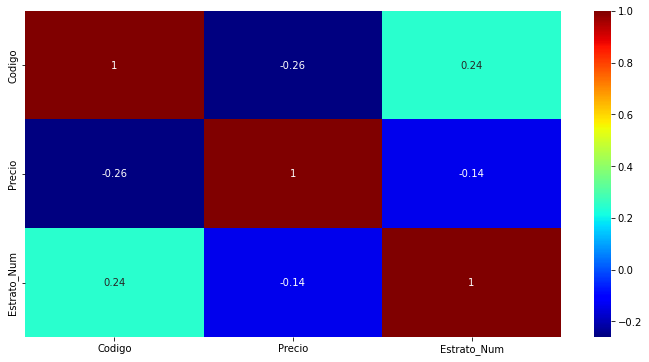

In [24]:
df.info()
#Ejecución de la matriz de correlación y una heatmap
plt.figure(figsize=(12,6))
cor = df.corr() #validando eliminiación outliers
sns.heatmap(cor,cmap="jet",annot=True)
cor


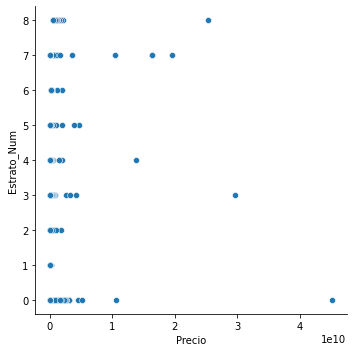

In [25]:
sns.relplot(x='Precio' ,y='Estrato_Num',data=df)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


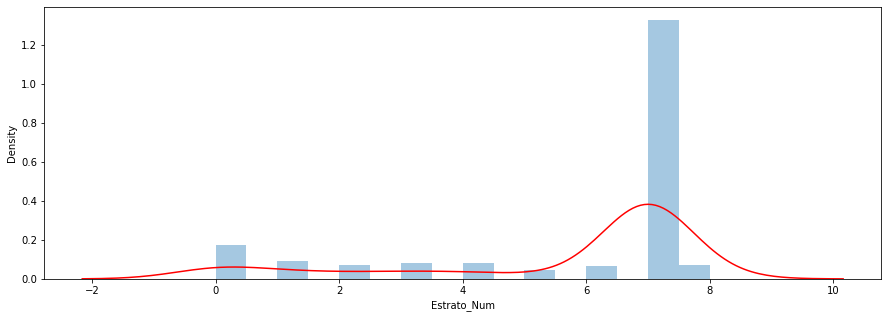

count    463.000000
mean       5.622030
std        2.454281
min        0.000000
25%        5.000000
50%        7.000000
75%        7.000000
max        8.000000
Name: Estrato_Num, dtype: float64


In [26]:
tag1= "Estrato_Num"
plt.figure(figsize=(15, 5))
sns.distplot(df[tag1], kde_kws= {"color":"r"})
plt.show()
print(df[tag1].describe()) 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Direccion               463 non-null    object 
 4   Detalle Disponibilidad  463 non-null    object 
 5   Estrato                 463 non-null    object 
 6   Precio                  463 non-null    float64
 7   Tipo de Inmueble        463 non-null    int64  
 8   Estrato_Num             463 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 32.7+ KB


In [56]:
# pd.get_dummies(df["Tipo de Inmueble"])


df1=df.filter(["Estrato","Ciudad","Tipo de Inmueble"], axis=1)




In [57]:
df1

,Estrato,Ciudad,Tipo de Inmueble
0,TRES,BOGOTA,0
1,COMERCIAL,BOGOTA,1
2,COMERCIAL,BOGOTA,1
3,CUATRO,SOGAMOSO,2
4,RURAL,BUGA,3
...,...,...,...
458,CUATRO,CALI,12
459,CUATRO,BOGOTA,11
460,CUATRO,CALI,12
461,CUATRO,CALI,12


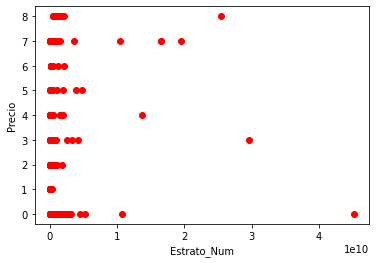

In [27]:
#grafico de corelacion lineal 
plt.plot(df['Precio'], df['Estrato_Num'], "ro")
plt.ylabel("Precio")
plt.xlabel("Estrato_Num") 
plt.show() 